#### Genel Bakış
Titanic, White Star Line'a ait olimpik sınıf bir transatlantik yolcu gemisiydi. Harland ve Wolff (Belfast, Kuzey İrlanda) tersanelerinde üretilmiştir. 15 Nisan 1912 gecesi ilk yolculuğunda bir buzdağına çarptı ve yaklaşık iki saat kırk dakika içinde Kuzey Atlantik'in buzlu sularına battı. 1912 yılında inşası tamamlandığında dünyanın en büyük buharlı yolcu gemisiydi. Batması 1.514 kişinin ölümüyle sonuçlanmış ve en büyük deniz felaketlerinden biri olarak tarihe geçmiştir.

#### Özellikler
1. survival - Hayatta kalma (0 = No; 1 = Yes)
2. class - Yolcu Sınıfı (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name - İsim
4. sex - Cinsiyet
5. age - Yaş
6. sibsp - Gemideki Kardeş/Eş Sayısı
7. parch - Gemideki Ebeveyn/Çocuk Sayısı
8. ticket - Bilet Numarası
9. fare - Yolcu Ücreti
10. cabin - Kabin
11. embarked - Biniş Limanı (C = Cherbourg; Q = Queenstown; S = Southampton)
12. boat - Cankurtaran botu (hayatta kaldıysa)
13. body - Ceset numarası (yaşamadıysa ve ceset bulunduysa)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Veri Toplama ve Gözlemleme

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Keşifsel Veri Analizi

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.shape

(891, 15)

In [8]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df["age"].mean()

29.69911764705882

<Axes: xlabel='age'>

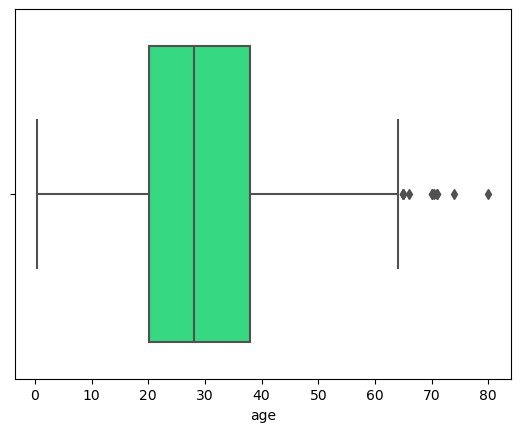

In [14]:
sns.boxplot(x = df["age"], color = "#1bf37f")

In [15]:
df[["age", "fare"]].describeribe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

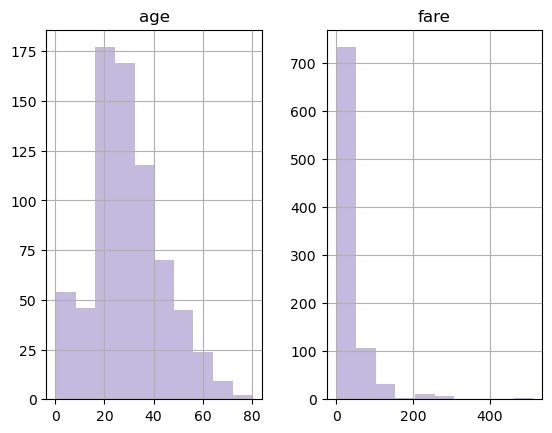

In [16]:
df[["age", "fare"]].hist(color = "#c4badd")

In [17]:
df["pclass"].uniqueue()

array([3, 1, 2], dtype=int64)

In [18]:
df["pclass"].dtype

dtype('int64')

In [19]:
df["pclass"].nunique()

3

In [20]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
num_cols = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

In [21]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [22]:
num_cols

[]

<Axes: xlabel='survived', ylabel='survived'>

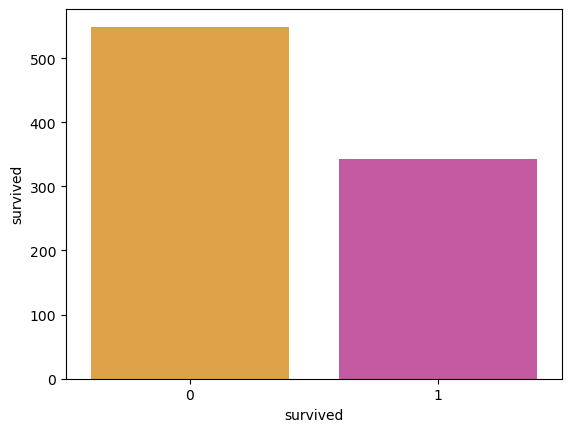

In [30]:
sns.barplot(data=df, x=df.survived, y=df.survived.value_counts(), palette=["#f7a82f", "#d54aa6"])

In [32]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [36]:
new_df = df.loc[(df["age"] > 50) & (df["sex"] == "male") & ((df["embark_town"] == "Cherbourg") | 
                (df["embark_town"] == "Southampton")), ["age", "class", "embark_town"]]

<Axes: xlabel='age', ylabel='embark_town'>

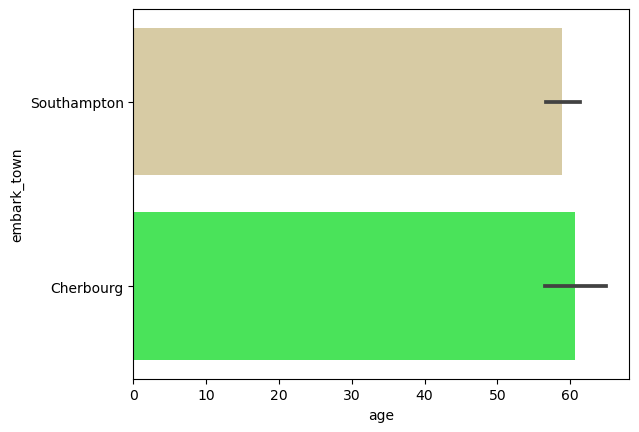

In [39]:
sns.barplot(data=new_df, x=new_df["age"], y=new_df["embark_town"], palette=["#dfcf9c", "#31fc46"])

In [40]:
from collections import Counter

In [46]:
def detect_outlier(df, features):
    outlier_indices = []

    for c in features:
        q1 = np.percentile(df[c],25)
        q3 = np.percentile(df[c],75)
        IQR = q3 - q1

        outlier_step = IQR * 1.5
        outliers_ = df[(df[c] < q1 - outlier_step) | (df[c] > q3 - outlier_step)].index
        outlier_indices.extend(outliers_)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, k in outlier_indices.items() if k > 2)

    return multiple_outliers

In [47]:
dropped_outlier = df.loc[detect_outlier(df, ["age", "fare", "sibsp", "parch"])]
dropped_outlier

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


In [48]:
df = df.drop(detect_outlier(df, ["age", "fare", "sibsp", "parch"]), axis=0).reset_index(drop=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
674,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
675,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
676,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [49]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            157
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           538
embark_town      2
alive            0
alone            0
dtype: int64

In [50]:
df["embarked"] = df["embarked"].fillna("C")

In [51]:
df["embarked"].isnull().sum()

0

In [52]:
correlation_list = ["age", "fare", "sibsp", "parch", "survived"]

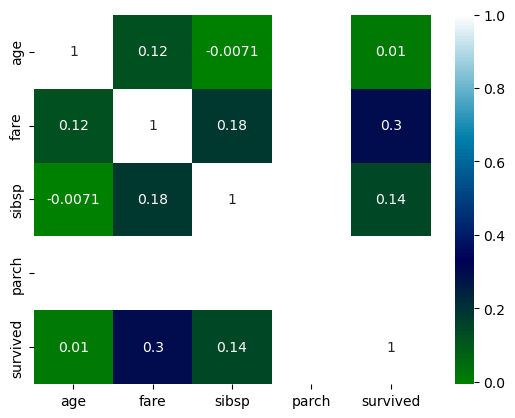

In [59]:
sns.heatmap(df[correlation_list].corr(), annot=True, cmap="ocean");

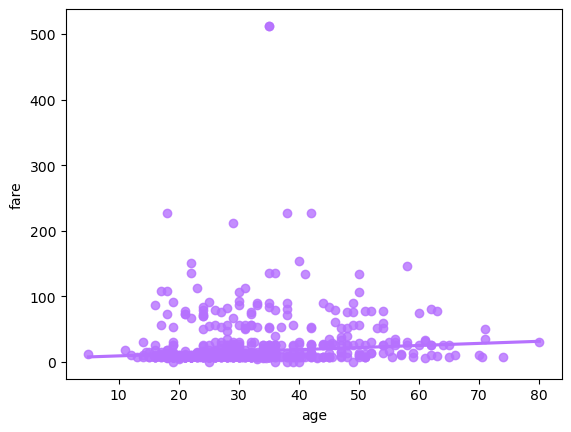

In [56]:
sns.regplot(x="age", y="fare", data=df, robust=True, ci=None, color="#b671fe");